<a href="https://colab.research.google.com/github/Haebuk/kuggle/blob/main/gamestop_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import accuracy_score, mean_squared_error
from lightgbm import LGBMRegressor 
import seaborn as sns
sns.set_style('darkgrid')

In [58]:
PATH = '/content/drive/MyDrive/input/'
df = pd.read_csv(PATH + 'GME_done.csv')
df['date'] = pd.to_datetime(df['date'])
print(df.shape)
df.head()

(2914, 3)


,date,open_price,volume
0,2010-01-04,22.070000,6675700
1,2010-01-05,22.910000,5317400
2,2010-01-06,23.459999,5367800
3,2010-01-07,20.010000,41190300
4,2010-01-08,20.639999,11968100


In [59]:
df['open_price'] = np.log1p(df['open_price'])
df.head()

,date,open_price,volume
0,2010-01-04,3.138533,6675700
1,2010-01-05,3.174297,5317400
2,2010-01-06,3.197039,5367800
3,2010-01-07,3.044999,41190300
4,2010-01-08,3.074543,11968100


In [60]:
def RMSLE(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def model_cv(df=df, model=lgb, fold=5):
    X = df.drop('date', axis=1)
    y = df['open_price']

    rmsle_list = []

    tscv = TimeSeriesSplit(n_splits=fold) # cv
    n_iter = 1
    for train_index, test_index in tscv.split(df):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model.fit(X_train, y_train) # train
        pred = model.predict(X_test) # predict

        rmsle = RMSLE(y_test, pred) # RMSLE
        rmsle_list.append(rmsle)
        print(f"====={n_iter}FOLDS=====")
        print(f"RMSLE: {rmsle:.4f}")
        n_iter += 1
    mean_rmsle = np.mean(rmsle_list)
    print('='*10)
    print('Mean RMSLE:', mean_rmsle)
    return pred, mean_rmsle


In [61]:
lgb = LGBMRegressor(learning_rate=0.1, max_depth=-1)
lgb_pred, lgb_mean_rmsle = model_cv(model=lgb)

=====1FOLDS=====
RMSLE: 0.2791
=====2FOLDS=====
RMSLE: 0.0089
=====3FOLDS=====
RMSLE: 0.0111
=====4FOLDS=====
RMSLE: 0.4665
=====5FOLDS=====
RMSLE: 0.5991
Mean RMSLE: 0.2729502937671432


In [70]:
def pred_plot(model, pred):
    plt.figure(figsize=(12, 6))
    plt.plot(df['date'], np.expm1(df['open_price']))
    plt.plot(df['date'][-len(pred):], np.expm1(pred)[-len(pred):])
    plt.legend(['original', 'predict'])
    plt.title(f'{model} Price Predict Graph')
    plt.xlabel('Year')
    plt.ylabel('Price')
    plt.show()

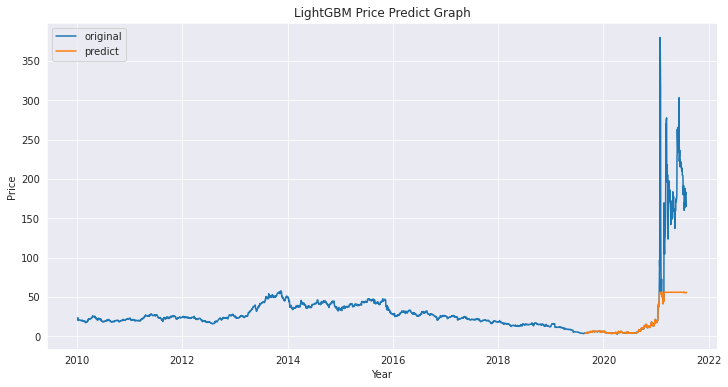

In [71]:
pred_plot('LightGBM', lgb_pred)